## Задание

Распознайте рукописную цифру, написанную на листе от руки.
Последовательность шагов следующая:

*   На бумаге рисуем произвольную цифру (желательно нарисовать цифру размером не
более 5 * 5 мм и без наклона. В занятии нейронка обучалась на цифрах американских студентов. Эти цифры были написаны на тетрадных листах в клетку и имели схожий размер).
*   Фотографируем. Загружаем фото в Collaboratory.
*   С помощью функции image.load_img(path, target_size=(28, 28), color_mode = ‘grayscale’) загружаем картинку в переменную.
*   С помощью функции image.img_to_array(img) преобразуем изображение в numpy-массив.
*   Выполняем инверсию цветов, нормирование и решейп массива.
*   Выполняем распознавание собственной рукописной цифры.

Примечание: точность распознавания рукописных цифр может быть достаточно низкой, т.к. рукописные цифры после преобразований хоть и похожи на содержащиеся в базе, но могут отличаться по конфигурации, толщине линий и т.д.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image

In [ ]:
# Ваше решение
# Загрузка датасета MNIST
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

# Преобразование x_train_org и x_test_org в одномерные массивы
x_train = x_train_org.reshape(x_train_org.shape[0], -1)
x_test = x_test_org.reshape(x_test_org.shape[0], -1)

# Преобразование x_train в тип float32 (числа с плавающей точкой) и нормализация
x_train = x_train.astype("float32") / 255.0

# Преобразование x_test в тип float32 (числа с плавающей точкой) и нормализация
x_test = x_test.astype("float32") / 255.0

CLASS_COUNT = 10  # Количество классов в MNIST

# Преобразование ответов в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, CLASS_COUNT)
y_test = utils.to_categorical(y_test_org, CLASS_COUNT)


In [ ]:
# Создание последовательной модели
model = Sequential()

# Добавление входного слоя с размерностью 784 (28x28 пикселей)
model.add(Input(shape=(784,)))

# Добавление полносвязного слоя на 800 нейронов с relu-активацией
model.add(Dense(800, activation="relu"))

# Добавление полносвязного слоя на 400 нейронов с relu-активацией
model.add(Dense(400, activation="relu"))

# Добавление полносвязного слоя с количеством нейронов по числу классов с softmax-активацией
model.add(Dense(CLASS_COUNT, activation="softmax"))

# Компиляция модели
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [15]:
model.fit(
    x_train,  # обучающая выборка, входные данные
    y_train,  # обучающая выборка, выходные данные
    batch_size=128,  # кол-во примеров, которое обрабатывает нейронка перед одним изменением весов
    epochs=15,  # количество эпох, когда нейронка обучается на всех примерах выборки
    verbose=1,
)  # 0 - не визуализировать ход обучения, 1 - визуализировать

Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8846 - loss: 0.3871
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9759 - loss: 0.0769
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9862 - loss: 0.0446
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9903 - loss: 0.0307
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9930 - loss: 0.0225
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9947 - loss: 0.0173
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9935 - loss: 0.0186
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9953 - loss: 0.0138
Epoch 9/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9965 - loss: 0.0107
Epoch 10/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9954 - loss: 0.0146
Epoch 11/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9961 - loss: 0.0121
Epoch 12/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [ ]:
model.save_weights("dz_ultra_pro.weights.h5")
model.load_weights("dz_ultra_pro.weights.h5")


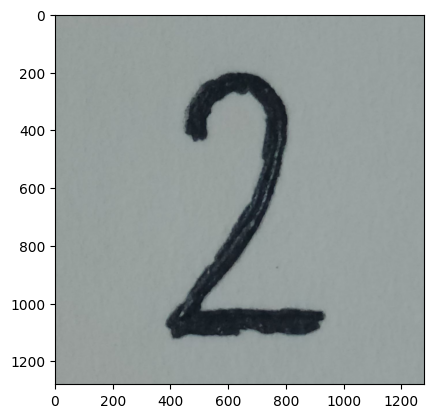

In [ ]:
img = image.load_img("image_2.png") # Загрузка изображения
plt.imshow(img) # Отображение изображения

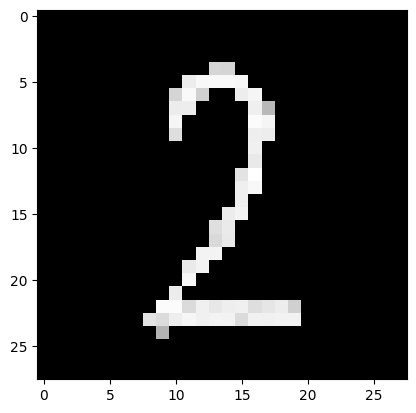

In [ ]:
# Загрузка изображения в оттенках серого и его преобразование
img2 = image.load_img("image_2.png", target_size=(28, 28), color_mode='grayscale')
img_array = image.img_to_array(img2) # Преобразование изображения в массив
img_array = 255 - img_array # Инвертирование цветов
img_array = np.where(img_array < 150, 0, img_array) # Создание абсолютно черного фона
plt.imshow(img_array, cmap="gray") # Отображение преобразованного изображения
# Преобразование массива в одномерный массив и нормализация
img_test = img_array.reshape(1, -1).astype("float32")  / 255.0 

In [ ]:
prediction = model.predict(img_test) # Предсказание класса
predicted_class = np.argmax(prediction) # Получение класса
print("Распознанная цифра:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Распознанная цифра: 2
